**Emerson Goncus** <br>
*goncus@gmail.com  (575) 791-2497* <br>
Pittsburgh, Pennsylvania

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

# https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/
from scipy.interpolate import make_interp_spline

# https://www.python-graph-gallery.com/treemap/#:~:text=A%20treemap%20displays%20each%20element,be%20used%20as%20follow%3A%F0%9F%94%A5
import squarify

# import ipywidgets as widgets
# from ipywidgets import GridspecLayout, #AppLayout, Button

import IPython.display
from IPython.display import Image

import urllib.request
from PIL import Image

In [2]:
list_date = [2003, 2004, 2005, 2006, 2007, 2008, 
             2009, 2010, 2011, 2012, 2013, 
             2014, 
             2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

competency_dict = {"Civil Engineering": [1, 1, 1, 2, 2, 
                                         5, 5, 4, 4, 3, 
                                         2, 
                                         3, 4, 2, 2, 2, 2, 3, 3, 2.5], 
                   "Data Analysis/\nProgramming": [2, 2, 3, 5, 4, 
                                     3, 3, 3, 3, 3, 
                                     4, 
                                     6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 10.6],
                   "Management": [1, 1, 3, 4, 4, 
                                  4, 6, 6, 6, 6, 
                                  5, 
                                  4, 3, 5, 6, 7, 6.5, 6, 6, 6.1], 
                   "Mechanical Engineering": [3, 4, 5, 6, 6.5, 
                                              6, 5, 4, 4, 4, 
                                              8, 
                                              9, 8, 3, 3, 4, 4, 3, 3, 3.5],
                   "Teaching/Presenting": [2, 2, 4, 4, 3,
                                3, 2, 4, 5, 6, 
                                4, 
                                4, 6, 8, 8, 8, 7, 7, 7, 7]
                   #"Running": [5, 4, 3, 7, 6, 
                   #            8, 8, 8, 8, 10, 
                   #            8, 
                   #            8, 7, 8, 9, 9, 8, 6, 6, 7], 
                   #"Coding/Software Development": [3, 3, 4, 3, 3, 
                   #                                2, 2, 2, 2, 2, 
                   #                                2, 
                   #                                3, 4, 5, 6, 6, 6, 7, 9, 10.2]
                   
                  }

# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.text.html

lang_df = pd.DataFrame({'relative strength':[.9, .9, .7, 1, .4, .3, .2], 
                               'group':["Excel", "PowerPoint", "Word", "R", "SQL", "Python", "Photoshop"] })

lang_colors = ['#1D6F42', '#D04423', '#185ABD', '#919198', '#D47131', '#7853bd', '#55ab73']
#63C2B4
#63C284
#D47131
#7853bd
#ff2828
#54bc78
#46b36c
#3c975b
#32a85b

#colors = cm.nipy_spectral(np.linspace(.15, .95, len(competency_dict)))
colors = ['#6a32a5', '#d42a34', '#eb6f0a', '#46ad34', '#0677ba']
#f78c37 orange
##62ca50 green


# patch.set_facecolor('#fafafa') # area directly around axis numbers
# vertical lines for change in employment
vertical_lines = np.array([2008, 2013, 2015])


ratio_list = [.6, # Header
              .4, # Summary Text
              .8, # Skills graph
              1.85,  # Experience Text
              .8] # Languages Treemap & Text
ratio_total = sum(ratio_list)


header_row = 0
summary_row = 1
skills_row = 2
exp_row = 3
lang_row = 4

spacing_ratio = .08

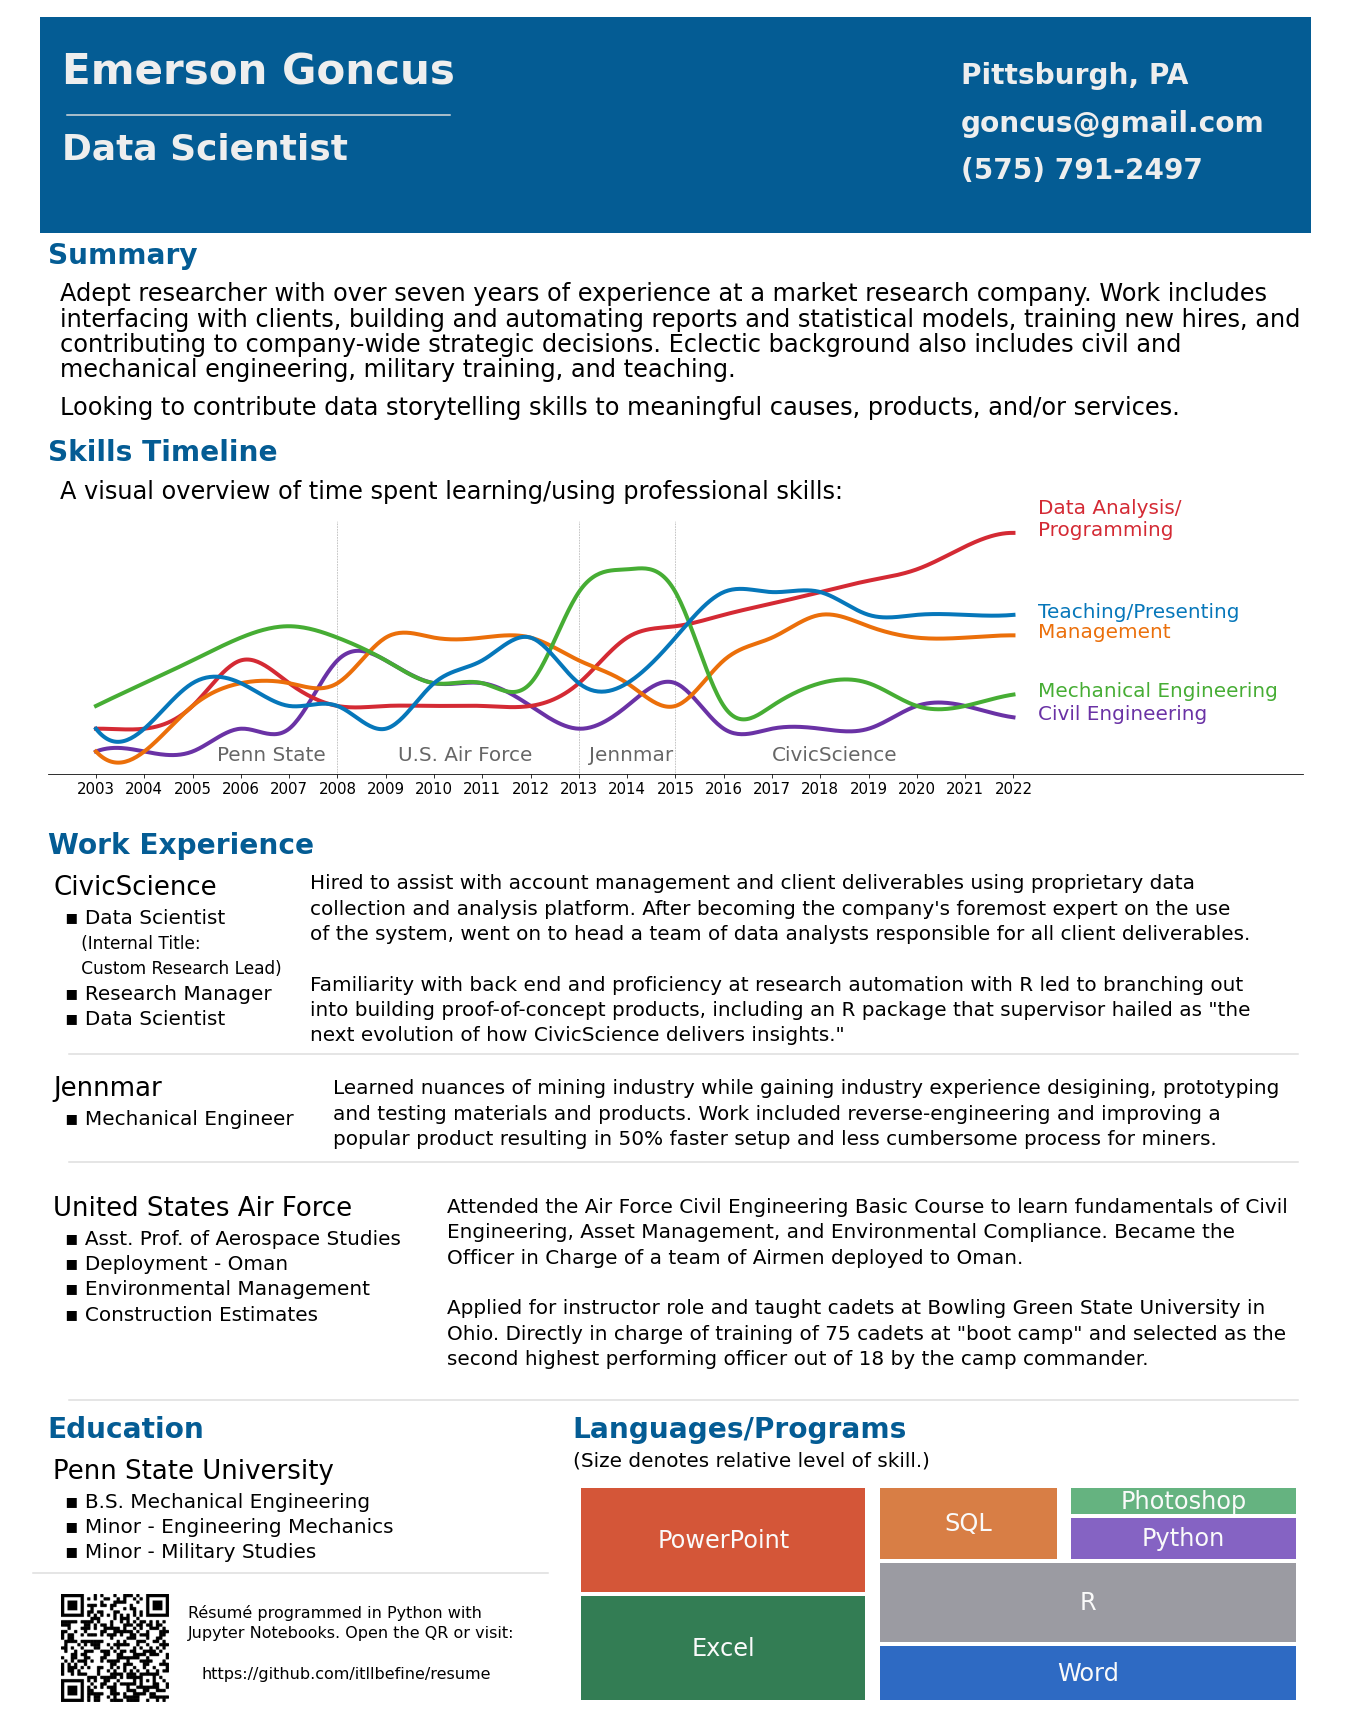

In [3]:
fig_resume = plt.figure(figsize = (22.5, 30))
grid = GridSpec(nrows=5, ncols=2,
               height_ratios=ratio_list)


### \/\/\/ Header Background Color \/\/\/ ###
ax_header_background = fig_resume.add_axes([0.12, .815, .785, .1])
#ax_header_background.set_facecolor('#ecf0fc') # plot area
#ax_header_background.set_facecolor('#00468b') # plot area
ax_header_background.set_facecolor('#045C94') # plot area
ax_header_background.axes.get_xaxis().set_visible(False)
ax_header_background.axes.get_yaxis().set_visible(False)
ax_header_background.spines['left'].set_visible(False)
ax_header_background.spines['right'].set_visible(False)
ax_header_background.spines['top'].set_visible(False)
ax_header_background.spines['bottom'].set_visible(False)
### /\/\/\ Header Background Color /\/\/\ ###


### \/\/\/ Header Divider Line \/\/\/ ###
ax_header_line = fig_resume.add_axes([0.125, .82, .26, .1])
ax_header_line.plot([0, 1], [1, 1], color='#dddddd')
ax_header_line.axis('off')
### /\/\/\ Header Divider Line /\/\/\ ###


### \/\/\/ Header Text \/\/\/ ###
ax_header = fig_resume.add_subplot(grid[header_row, 0])
ax_header.text(.025, 1.05, 'Emerson Goncus', fontsize=42,  fontweight=1000, color='#eeeeee')
ax_header.text(.025, .65, 'Data Scientist', fontsize=36, fontweight=555, color='#eeeeee')
ax_header.axis('off')
### /\/\/\ Header Text /\/\/\ ###


### \/\/\/ Contact Text \/\/\/ ###
ax_contact = fig_resume.add_subplot(grid[header_row, 1])
ax_contact_x_offset = .4
contact_loc = 1.05
contact_spacing = .25
ax_contact.text(ax_contact_x_offset, contact_loc, 'Pittsburgh, PA', fontsize=28,  fontweight=555, color='#eeeeee')
contact_loc -= contact_spacing
ax_contact.text(ax_contact_x_offset, contact_loc, 'goncus@gmail.com', fontsize=28, fontweight=555, color='#eeeeee')
contact_loc -= contact_spacing
ax_contact.text(ax_contact_x_offset, contact_loc, '(575) 791-2497', fontsize=28, fontweight=555, color='#eeeeee')
ax_contact.axis('off')
### /\/\/\ Contact Text /\/\/\ ###


### \/\/\/ Summary Text & Skills Header Text \/\/\/ ###
ax_summary = fig_resume.add_subplot(grid[1, :])
#ax_summary.set_xlim(right=.8)

summary_loc = 1.6
summary_spacing = spacing_ratio/ratio_list[summary_row]

ax_summary.text(0, summary_loc, 'Summary', fontsize=28, fontweight=555, color='#045C94')
summary_loc -= summary_spacing*1.5

ax_summary.text(.01, summary_loc, "Adept researcher with over seven years of experience at a market research company. Work includes", fontsize=24)
summary_loc -= summary_spacing
ax_summary.text(.01, summary_loc, "interfacing with clients, building and automating reports and statistical models, training new hires, and", fontsize=24)
summary_loc -= summary_spacing
ax_summary.text(.01, summary_loc, "contributing to company-wide strategic decisions. Eclectic background also includes civil and", fontsize=24)
summary_loc -= summary_spacing
ax_summary.text(.01, summary_loc, "mechanical engineering, military training, and teaching.", fontsize=24)
summary_loc -= summary_spacing*1.5
ax_summary.text(.01, summary_loc, 'Looking to contribute data storytelling skills to meaningful causes, products, and/or services.', fontsize=24)
summary_loc -= summary_spacing*1.8
# ax_summary.text(0, -.1, 'Skill Acquisition Timeline', fontsize=22, fontweight=555, color='#045C94')

ax_summary.text(0, summary_loc, "Skills Timeline", fontsize=28, fontweight=555, color='#045C94', ha="left")
summary_loc -= summary_spacing*1.5
ax_summary.text(.01, summary_loc, "A visual overview of time spent learning/using professional skills:", fontsize=24)

ax_summary.axis('off')
### /\/\/\ summary Text /\/\/\ ###




### \/\/\/ Skills Graph \/\/\/ ###
skills_fontsize = 20
ax_skills = fig_resume.add_subplot(grid[2, :])


ax_skills.text(2005.5, .6, "Penn State",
        fontsize=skills_fontsize, fontweight=500, color='#666666', ha="left")
ax_skills.text(2009.25, .6, "U.S. Air Force",
        fontsize=skills_fontsize, fontweight=500, color='#666666', ha="left")
ax_skills.text(2013.2, .6, "Jennmar",
        fontsize=skills_fontsize, fontweight=500, color='#666666', ha="left")
ax_skills.text(2017, .6, "CivicScience",
        fontsize=skills_fontsize, fontweight=500, color='#666666', ha="left")
ax_skills.set_xlim(2002, 2028) # change end to fit labels
ax_skills.tick_params(labelsize = 15)
#ax_skills.set_facecolor('#efefef') # plot area; previously #fafafa
ax_skills.axes.get_yaxis().set_visible(False)
ax_skills.spines['left'].set_visible(False)
ax_skills.spines['right'].set_visible(False)
ax_skills.spines['top'].set_visible(False)

# vertical_lines = np.arange(list_date[0], list_date[len(list_date)-1], 10)
array_date = np.array(list_date)
x = np.linspace(array_date.min(), array_date.max(), 500)

for i in vertical_lines:
    ax_skills.axvline(i, color='#666666', lw=0.6, ls='dotted', zorder=0)
label_x = 2022.5
ax_skills.set_prop_cycle('color', list(colors))
counter = 0

for key in competency_dict.keys():
    array = np.array(competency_dict[key])
    spline = make_interp_spline(array_date, array)
    y = spline(x)
    plt.plot(x, y, linewidth = 4)
    label_y =array[len(array) - 1]-.1
    
    ax_skills.text(label_x, label_y, key, fontsize = skills_fontsize, fontweight = 500, color = colors[counter])
    counter += 1
plt.xticks(list_date)
### /\/\/\ Skills Graph /\/\/\ ###


### \/\/\/ Experience Bullets \/\/\/ ###
#date_spacing = .7

## Bullet character candidates ▪  ▫ •  ◦  ●
exp_ver_loc = .96
exp_spacing = spacing_ratio/ratio_list[exp_row]
ax_exp_bullets = fig_resume.add_subplot(grid[exp_row, 0])



ax_exp_bullets.text(0, exp_ver_loc, 'Work Experience', fontsize=28, fontweight=555, color='#045C94')
exp_ver_loc -= exp_spacing*1.6


## \/ CivicScience  \/ ##
ax_exp_bullets.text(0.01, exp_ver_loc, 'CivicScience', fontsize=26)
#ax_exp_bullets.text(date_spacing, exp_ver_loc, '2015 - Present', fontsize=26)
exp_ver_loc -= exp_spacing*1.15
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Data Scientist', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '   (Internal Title:', fontsize=17)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '   Custom Research Lead)', fontsize=17)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Research Manager', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Data Scientist', fontsize=20)
exp_ver_loc -= exp_spacing*2.8
## /\ CivicScience /\ ##

## \/ Jennmar  \/ ##
ax_exp_bullets.text(0.01, exp_ver_loc, 'Jennmar', fontsize=26)
#ax_exp_bullets.text(date_spacing, exp_ver_loc, '2013 - 2015', fontsize=26)
exp_ver_loc -= exp_spacing*1.15
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Mechanical Engineer', fontsize=20)
exp_ver_loc -= exp_spacing*3.6
## /\ Jennmar /\ ##





## \/ Air Force \/ ##
ax_exp_bullets.text(0.01, exp_ver_loc, 'United States Air Force', fontsize=26)
#ax_exp_bullets.text(date_spacing, exp_ver_loc, '2008 - 2013', fontsize=26)
exp_ver_loc -= exp_spacing*1.15
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Asst. Prof. of Aerospace Studies', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Deployment - Oman', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Environmental Management', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Construction Estimates', fontsize=20)
exp_ver_loc -= exp_spacing*4.65
## /\ Air Force /\ ##


## \/ School Bullets \/ ##
ax_exp_bullets.text(0, exp_ver_loc, 'Education', fontsize=28, fontweight=555, color='#045C94')
exp_ver_loc -= exp_spacing*1.6
ax_exp_bullets.text(0.01, exp_ver_loc, 'Penn State University', fontsize=26)
#ax_exp_bullets.text(date_spacing, exp_ver_loc, '2003 - 2008', fontsize=26)
exp_ver_loc -= exp_spacing*1.15
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ B.S. Mechanical Engineering', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Minor - Engineering Mechanics', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_bullets.text(0.03, exp_ver_loc, '▪ Minor - Military Studies', fontsize=20)

## /\ School Bullets /\ ##


ax_exp_bullets.axis('off')
### /\/\/\ Experience Bullets /\/\/\ ###



### \/\/\/ Experience Text \/\/\/ ###
exp_ver_loc = .9
exp_hor_loc_cs = -.74
exp_hor_loc_jm = -.7
exp_hor_loc_af = -.5
#exp_hor_loc_ps = -.6

ax_exp_text = fig_resume.add_subplot(grid[exp_row, 1])


## \/ CivicScience Text \/ ##
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, 'Hired to assist with account management and client deliverables using proprietary data ', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, "collection and analysis platform. After becoming the company's foremost expert on the use ", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, "of the system, went on to head a team of data analysts responsible for all client deliverables.", fontsize=20)
exp_ver_loc -= exp_spacing*2
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, "Familiarity with back end and proficiency at research automation with R led to branching out", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, "into building proof-of-concept products, including an R package that supervisor hailed as \"the", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_cs, exp_ver_loc, "next evolution of how CivicScience delivers insights.\"", fontsize=20)
exp_ver_loc -= exp_spacing*2.11
#▪ Managed team of data analysts responsible for client project completion
#▪ Conceived of and programmed R package to automate insight discovery
## /\ CivicScience Text /\ ##


## \/ Jennmar Text \/ ##

ax_exp_text.text(exp_hor_loc_jm, exp_ver_loc, 'Learned nuances of mining industry while gaining industry experience desigining, prototyping', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_jm, exp_ver_loc, "and testing materials and products. Work included reverse-engineering and improving a", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_jm, exp_ver_loc, "popular product resulting in 50% faster setup and less cumbersome process for miners.", fontsize=20)
exp_ver_loc -= exp_spacing*2.7
## /\ Jennmar Text /\ ##



## \/ Air Force Text \/ ##
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, 'Attended the Air Force Civil Engineering Basic Course to learn fundamentals of Civil', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, 'Engineering, Asset Management, and Environmental Compliance. Became the', fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, "Officer in Charge of a team of Airmen deployed to Oman. ", fontsize=20)
exp_ver_loc -= exp_spacing*2
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, "Applied for instructor role and taught cadets at Bowling Green State University in", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, "Ohio. Directly in charge of training of 75 cadets at \"boot camp\" and selected as the", fontsize=20)
exp_ver_loc -= exp_spacing
ax_exp_text.text(exp_hor_loc_af, exp_ver_loc, "second highest performing officer out of 18 by the camp commander.", fontsize=20)
## /\ Air Force Text /\ ##

## \/ School Text \/ ##
#exp_ver_loc -= exp_spacing*1.6
#exp_ver_loc -= exp_spacing*1.15
#ax_exp_text.text(exp_hor_loc_ps, exp_ver_loc, '▪ Pursued engineering after falling for high school physics', fontsize=20)
#exp_ver_loc -= exp_spacing
#ax_exp_text.text(exp_hor_loc_ps, exp_ver_loc, '▪ Favorite subjects included stress analysis and non-destructive testing', fontsize=20)
#exp_ver_loc -= exp_spacing
#ax_exp_text.text(exp_hor_loc_ps, exp_ver_loc, '▪ Enrolled in Air Force ROTC and prepared for active duty during school', fontsize=20)

## /\ School Text /\ ##


ax_exp_text.axis('off')
### /\/\/\ Experience Text /\/\/\ ###


### \/\/\/ Divider Lines \/\/\/ ###

## \/ CivicScience Divider Line \/ ##
ax_cs_div_line = fig_resume.add_axes([0.1, .385, .835, .1]) #Second number in the add_axes dictates vertical position from 0-1
ax_cs_div_line.plot([0, 1], [1, 1], color='#dddddd')
ax_cs_div_line.axis('off')
## /\ CivicScience Divider Line /\ ##


## \/ Jennmar Divider Line \/ ##
ax_jm_div_line = fig_resume.add_axes([0.1, .335, .835, .1]) #Second number in the add_axes dictates vertical position from 0-1
ax_jm_div_line.plot([0, 1], [1, 1], color='#dddddd')
ax_jm_div_line.axis('off')
## /\ Jennmar Divider Line /\ ##


## \/ Air Force Divider Line \/ ##
ax_af_div_line = fig_resume.add_axes([0.1, .225, .835, .1]) #Second number in the add_axes dictates vertical position from 0-1
ax_af_div_line.plot([0, 1], [1, 1], color='#dddddd')
ax_af_div_line.axis('off')
## /\ Air Force Divider Line /\ ##



## \/ Education Divider Line \/ ##
ax_af_div_line = fig_resume.add_axes([0.1, .145, .35, .1]) #Second number in the add_axes dictates vertical position from 0-1
ax_af_div_line.plot([0, 1], [1, 1], color='#dddddd')
ax_af_div_line.axis('off')
## /\ Education Divider Line /\ ##

### /\/\/\ Divider Lines /\/\/\ ###



### \/\/\/ Résumé Info \/\/\/ ###
#interests_loc = 1.05
#interests_spacing = spacing_ratio/ratio_list[lang_row]

resume_ver_loc = .42
res_spacing = .08

ax_resume_text = fig_resume.add_subplot(grid[lang_row, 0])
ax_resume_text.text(0.245, resume_ver_loc, 'Résumé programmed in Python with', fontsize=16)
resume_ver_loc -= res_spacing
ax_resume_text.text(0.245, resume_ver_loc, 'Jupyter Notebooks. Open the QR or visit:', fontsize=16)
resume_ver_loc -= res_spacing*2
ax_resume_text.text(0.27, resume_ver_loc, 'https://github.com/itllbefine/resume', fontsize=16)
ax_resume_text.axis('off')

## \/ QR Code \/ ##
urllib.request.urlretrieve("https://raw.githubusercontent.com/itllbefine/resume/main/resume%20QR.png", "resume QR")
resume_QR = Image.open("resume QR")
ax_resume_QR = fig_resume.add_axes([.13, .135, .07, .05], anchor='NE', zorder=1)
ax_resume_QR.imshow(resume_QR)
ax_resume_QR.axis('off')

## /\ QR Code /\ ##



### \/\/\/ Languages Treemap \/\/\/ ###
ax_lang_text = fig_resume.add_subplot(grid[lang_row, 1])
ax_lang_text.text(-.28, 1.135, 'Languages/Programs', fontsize=28, fontweight=555, color='#045C94')
ax_lang_text.text(-.28, 1.02, '(Size denotes relative level of skill.)', fontsize=20)
#ax_lang_text.text(0, lang_loc, 'some text', fontsize=20)
#lang_loc -= lang_spacing
#ax_lang_text.text(0, lang_loc, 'some more text', fontsize=16)
#lang_loc -= lang_spacing

ax_lang_text.axis('off')
#ax_af_div_line = fig_resume.add_axes([0.1, .225, .835, .1]) 
#ax_lang = fig_resume.add_subplot(grid[lang_row, 1])
ax_lang = fig_resume.add_axes([.45, .135, .45, .1])
ax_lang = squarify.plot(sizes=lang_df['relative strength'], label=lang_df['group'], 
              alpha=.9,
              color=lang_colors,
              pad=2,
              text_kwargs={'fontsize':24, 'color':'#fafafa'})
ax_lang.axis('off')
### /\/\/\ Languages Treemap /\/\/\ ###



#fig_resume.patch.set_facecolor('#fafafa') # entire figure
plt.show() # removes the random dimension info at the top